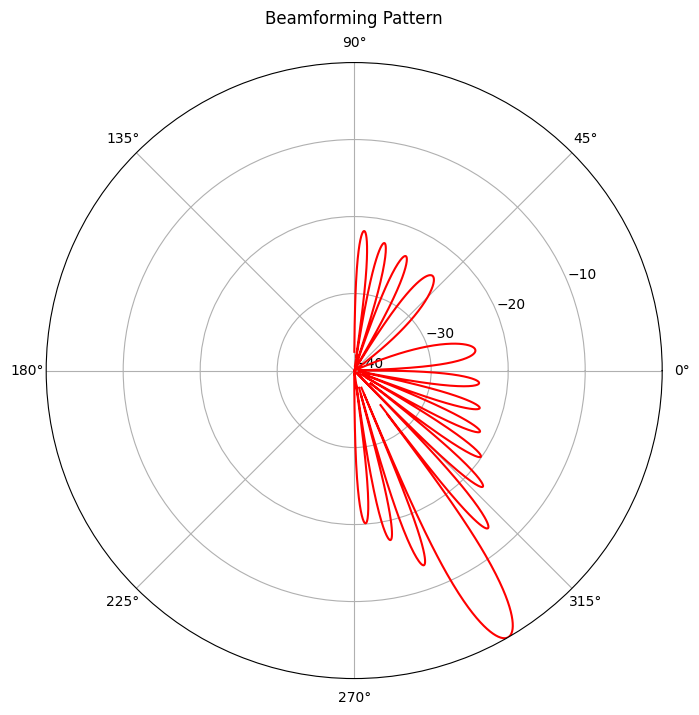

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def antenna_array(N, d, steer_angle):
    """
    Generate the array factor for a linear antenna array.

    Parameters:
    N           : Number of elements in the array
    d           : Inter-element spacing in wavelengths
    steer_angle : Steering angle in degrees

    Returns:
    theta       : Angle range in radians
    beam_pattern: Beam pattern in dB
    """
    # Element positions (assumes linear array, centered at 0)
    n = np.arange(-(N-1)/2, (N-1)/2 + 1)

    # Angle range for plotting
    theta = np.linspace(-np.pi/2, np.pi/2, 1800)

    # Steering vector (phase shift based on steer angle)
    steer_angle_rad = np.radians(steer_angle)

    # Array factor calculation (beamforming pattern)
    array_factor = np.zeros_like(theta, dtype=complex)
    for i in range(N):
        array_factor += np.exp(1j * 2 * np.pi * d * n[i] * np.cos(theta - steer_angle_rad))

    # Normalize and convert to dB
    beam_pattern = 20 * np.log10(np.abs(array_factor) / np.max(np.abs(array_factor)))
    return theta, beam_pattern

def plot_beam_pattern(theta, beam_pattern):
    """
    Plot the beam pattern in polar coordinates.

    Parameters:
    theta        : Angles in radians
    beam_pattern : Beam pattern in dB
    """
    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, projection='polar')
    ax.plot(theta, beam_pattern, label="Beam Pattern", color='r')
    ax.set_title("Beamforming Pattern", va='bottom')
    ax.set_ylim([-40, 0])  # Limiting the dB range for clarity
    ax.set_yticks(np.arange(-40, 0, 10))
    ax.grid(True)
    plt.show()

def simulate_5g_beamforming():
    """
    Simulate beamforming for a 5G environment setup (similar to Starlink-like Dishy system).
    """
    # Antenna array setup (Dishy-like antenna configuration)
    N = 16       # Number of elements in the antenna array
    d = 0.5      # Spacing between antenna elements (in wavelengths)
    steer_angle = 30  # Steering angle in degrees (towards a target user or satellite)

    # Generate and plot the beam pattern
    theta, beam_pattern = antenna_array(N, d, steer_angle)
    plot_beam_pattern(theta, beam_pattern)

# Run the simulation
simulate_5g_beamforming()


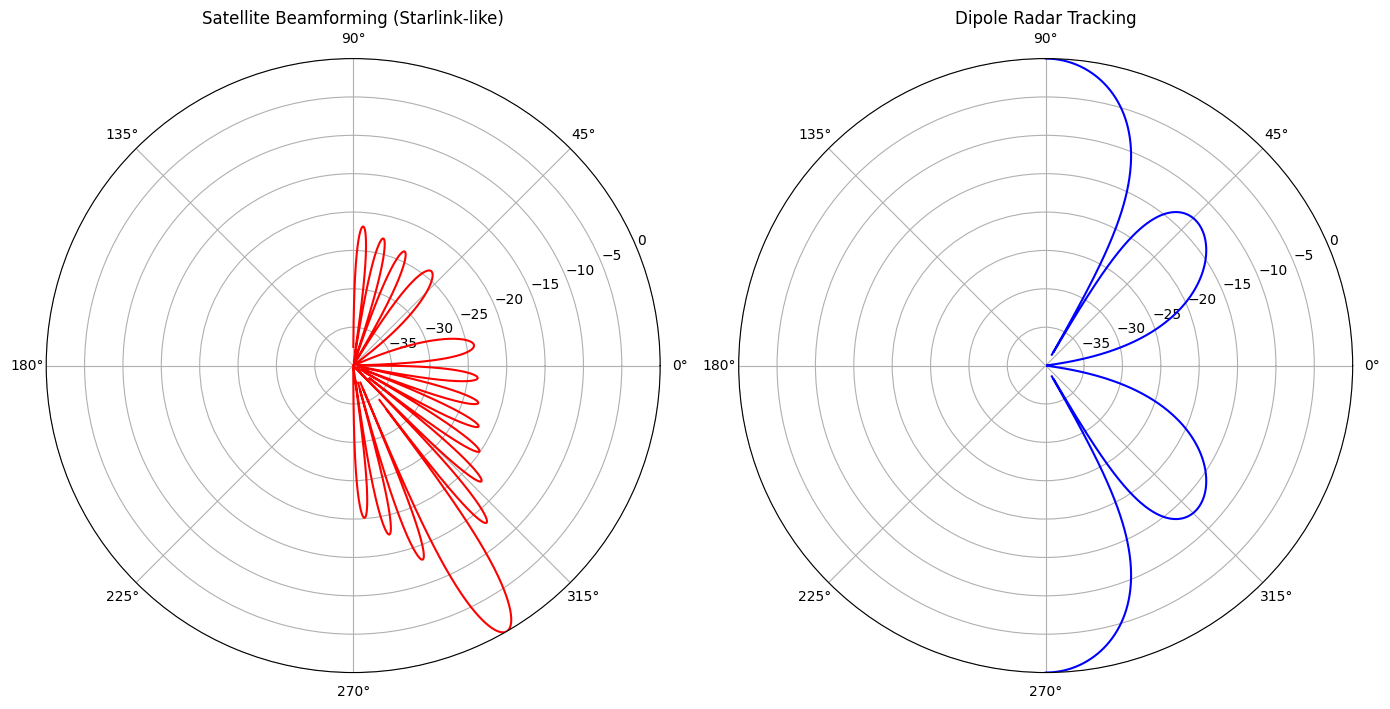

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate radar scanning (dipole radar system)
def dipole_radar_tracking(N, d, scan_angle, target_speed, target_distance):
    """
    Simulate radar scanning and target tracking using a dipole antenna.

    Parameters:
    N             : Number of elements in the radar array (if using phased array)
    d             : Inter-element spacing in wavelengths (if using phased array)
    scan_angle    : Initial scan angle in degrees
    target_speed  : Speed of the target (satellite) in km/s
    target_distance : Distance to the target in km

    Returns:
    theta         : Angle range in radians
    scan_pattern  : Radar scanning pattern in dB
    """
    n = np.arange(-(N-1)/2, (N-1)/2 + 1)
    theta = np.linspace(-np.pi/2, np.pi/2, 1800)
    scan_angle_rad = np.radians(scan_angle)

    # Simulate radar scanning with Doppler shift consideration
    # Doppler shift formula: f_D = (2 * v * cos(theta)) / lambda, where v = target speed
    doppler_shift = 2 * target_speed * np.cos(theta) / target_distance

    # Initialize the scan pattern array
    scan_pattern_real = np.zeros_like(theta)
    scan_pattern_imag = np.zeros_like(theta)

    # Accumulate the real and imaginary parts
    for i in range(N):
        scan_pattern_real += np.cos(np.pi * d * n[i] * np.cos(theta - scan_angle_rad)) * np.cos(doppler_shift)
        scan_pattern_imag += np.sin(np.pi * d * n[i] * np.cos(theta - scan_angle_rad)) * np.sin(doppler_shift)

    # Combine real and imaginary parts to get the final scan pattern
    scan_pattern = np.sqrt(scan_pattern_real**2 + scan_pattern_imag**2)

    # Convert the scan pattern to dB scale
    scan_pattern_dB = 20 * np.log10(scan_pattern / np.max(scan_pattern))

    return theta, scan_pattern_dB

# Function to plot beamforming and radar scanning patterns
def plot_comparison(satellite_theta, satellite_beam, radar_theta, radar_scan):
    """
    Plot the comparison of satellite beamforming and radar scanning patterns.

    Parameters:
    satellite_theta  : Angles for satellite beamforming
    satellite_beam   : Beam pattern in dB for satellite
    radar_theta      : Angles for radar scanning
    radar_scan       : Scan pattern in dB for radar
    """
    plt.figure(figsize=(14, 8))

    # Plot satellite beamforming
    ax1 = plt.subplot(1, 2, 1, projection='polar')
    ax1.plot(satellite_theta, satellite_beam, color='r')
    ax1.set_title("Satellite Beamforming (Starlink-like)")
    ax1.set_ylim([-40, 0])  # dB scale

    # Plot radar scanning
    ax2 = plt.subplot(1, 2, 2, projection='polar')
    ax2.plot(radar_theta, radar_scan, color='b')
    ax2.set_title("Dipole Radar Tracking")
    ax2.set_ylim([-40, 0])  # dB scale

    plt.tight_layout()
    plt.show()

# Main function to simulate and plot the comparison
def simulate_comparison():
    # Parameters for satellite beamforming (Starlink-like)
    N_satellite = 16      # Number of elements in the phased array
    d_satellite = 0.5     # Inter-element spacing in wavelengths
    steer_angle_satellite = 30  # Steering angle in degrees

    # Parameters for dipole radar tracking
    N_radar = 8          # Number of elements in radar array (for phased array)
    d_radar = 0.5        # Inter-element spacing in wavelengths
    scan_angle_radar = 0 # Initial scan angle in degrees
    target_speed = 7.6   # Target speed (satellite) in km/s (low earth orbit)
    target_distance = 7000  # Target distance in km (satellite altitude)

    # Simulate beamforming for satellite communication
    satellite_theta, satellite_beam = satellite_beamforming(N_satellite, d_satellite, steer_angle_satellite)

    # Simulate radar scanning for tracking
    radar_theta, radar_scan = dipole_radar_tracking(N_radar, d_radar, scan_angle_radar, target_speed, target_distance)

    # Plot comparison of both systems
    plot_comparison(satellite_theta, satellite_beam, radar_theta, radar_scan)

# Run the comparison simulation
simulate_comparison()
